In [9]:
import pandas as pd
from glob import glob

In [16]:
generators = ['cg', 'ctgan', 'gc', 'tvaes']
list_df = []

for i in generators:
    files = glob(f'../results/{i}/predictors*.xlsx')
    df = pd.concat(pd.read_excel(excel_file) for excel_file in files)
    df['generator'] = i
    df['type'] = df['model'].apply(lambda x: x.split('_')[0])
    list_df.append(df)

In [30]:
metrics = ['type', 'roc_auc', 'f1', 'precision', 'recall', 'accuracy', 'generator']

Obtener los mejores 10 algoritmos

In [31]:
list_best = []
for df in list_df:
    best_types = df[df['roc_auc'].notnull()].sort_values(['roc_auc', 'accuracy'], ascending=False).groupby('type').head(1).head(5)['type'].tolist()
    best_models = (
        df[df["type"].isin(best_types)]
        .dropna(subset=["roc_auc"])  # Eliminar valores nulos en roc_auc
        .sort_values(["roc_auc", "accuracy"], ascending=False)
        .groupby("type")
        .head(10)
    )
    list_best.append(best_models)

In [32]:
result_df = pd.concat(list_best, ignore_index=True)

In [33]:
result_df.sort_values(['roc_auc'], ascending=False)[metrics]

,type,roc_auc,f1,precision,recall,accuracy,generator
150,NeuralNetTorch,1.000000,0.909091,0.833333,1.0,0.950,tvaes
151,NeuralNetTorch,0.993333,0.666667,0.500000,1.0,0.750,tvaes
152,NeuralNetTorch,0.993333,0.857143,0.818182,0.9,0.925,tvaes
153,NeuralNetFastAI,0.993333,0.857143,0.818182,0.9,0.925,tvaes
154,NeuralNetFastAI,0.993333,0.869565,0.769231,1.0,0.925,tvaes
...,...,...,...,...,...,...,...
199,WeightedEnsemble,0.846667,0.636364,0.583333,0.7,0.800,tvaes
96,WeightedEnsemble,0.843333,0.551724,0.421053,0.8,0.675,ctgan
97,WeightedEnsemble,0.836667,0.516129,0.380952,0.8,0.625,ctgan
98,WeightedEnsemble,0.816667,0.521739,0.461538,0.6,0.725,ctgan


C:\Users\jgala\AppData\Local\Temp\ipykernel_13580\300763831.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


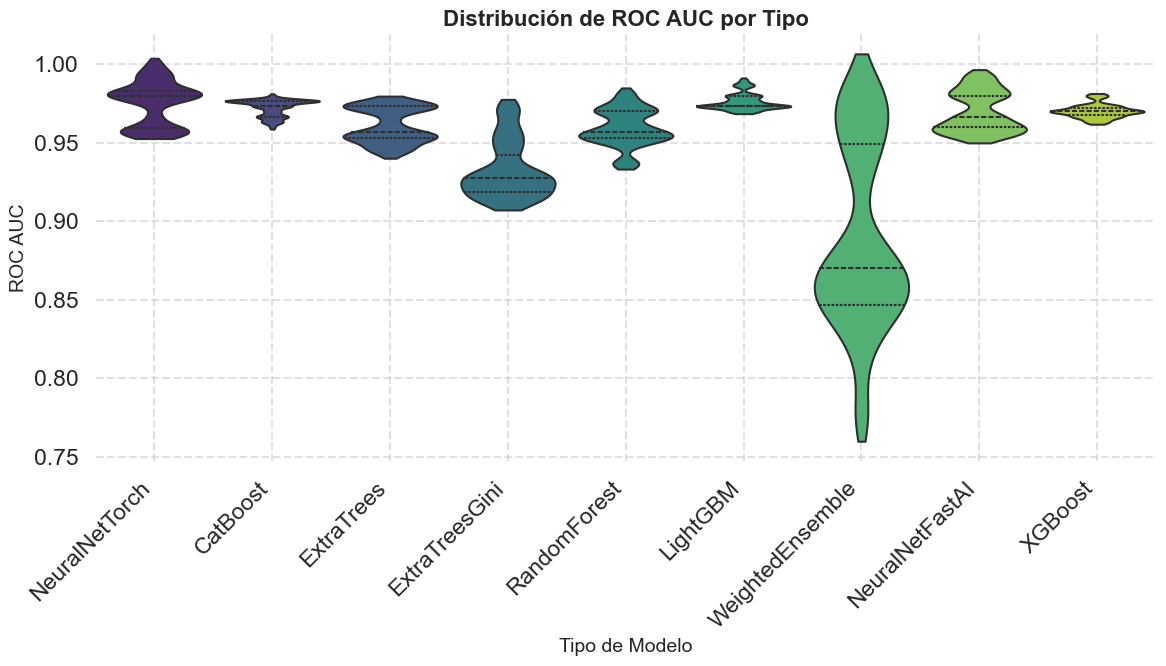

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo científico mejorado
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Configurar la figura
fig, ax = plt.subplots(figsize=(12, 7))

# Gráfico de violín con mejor visibilidad
sns.violinplot(
    data=result_df, x="type", y="roc_auc", 
    bw_adjust=0.5, cut=1, linewidth=1.5, 
    palette="viridis", inner="quartile"
)

# Personalización de etiquetas y título
ax.set_title("Distribución de ROC AUC por Tipo", fontsize=16, fontweight="bold")
ax.set_xlabel("Tipo de Modelo", fontsize=14)
ax.set_ylabel("ROC AUC", fontsize=14)

# Rotar etiquetas del eje X para evitar cortes
plt.xticks(rotation=45, ha="right")

# Mejorar la visibilidad de los ejes
sns.despine(left=True, bottom=True)
ax.grid(True, linestyle="--", alpha=0.6)

# Ajustar automáticamente los márgenes para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


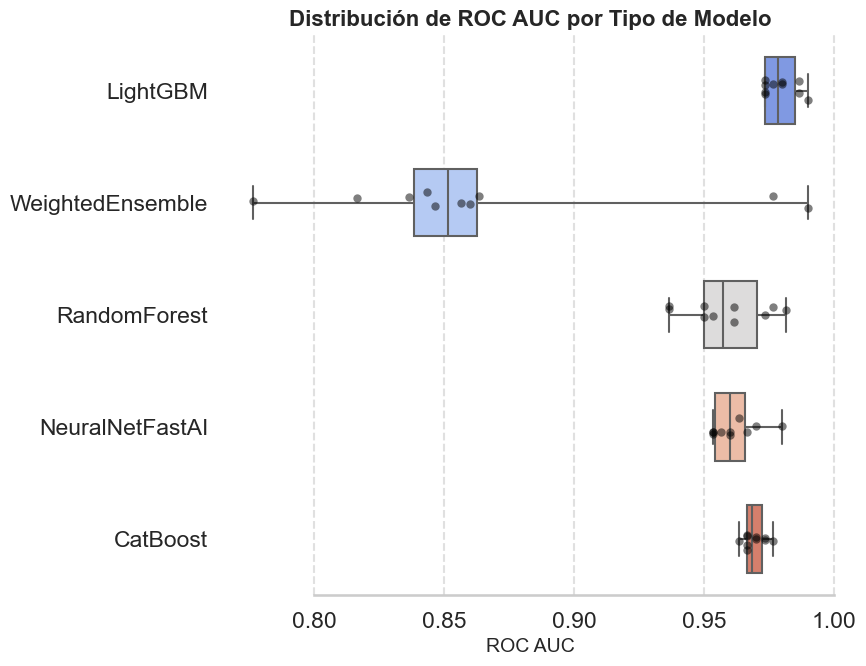

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mejorado para visualización clara
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Inicializar la figura
fig, ax = plt.subplots(figsize=(9, 7))

# Gráfico de caja con mejor visibilidad
sns.boxplot(
    data=top_df, x="roc_auc", y="type", hue="type",
    whis=[0, 100], width=0.6, palette="coolwarm", 
    linewidth=1.5, fliersize=0  # Ocultar outliers ya que se mostrarán con stripplot
)

# Agregar puntos individuales para cada observación
sns.stripplot(
    data=top_df, x="roc_auc", y="type", size=6, 
    color="black", alpha=0.5, jitter=True  # Mejor dispersión y visibilidad
)

# Personalización del gráfico
ax.set_title("Distribución de ROC AUC por Tipo de Modelo", fontsize=16, fontweight="bold")
ax.set_xlabel("ROC AUC", fontsize=14)
ax.set_ylabel("")  # Se mantiene vacío para claridad
ax.xaxis.grid(True, linestyle="--", alpha=0.6)  # Líneas de cuadrícula más sutiles

# Ampliar el eje X hasta 1

# Despinar para un diseño más limpio
sns.despine(trim=True, left=True)

# Ajustar automáticamente el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
